# Reed-Solomon Error Detection and Correction

Reed-Solomon codes are a group of error-correcting codes that were introduced by Irving S. Reed and Gustave Solomon in 1960. They are widely used in digital communication systems, including CDs, DVDs, QR codes, and more. Reed-Solomon codes are based on polynomial arithmetic and are capable of detecting and correcting multiple errors in data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a simple Reed-Solomon encoding function using NumPy
def reed_solomon_encode(message, n_parity):
    """Encodes a message with Reed-Solomon parity symbols."""
    message = np.array(message, dtype=np.uint8)
    parity = np.mod(np.polyval(message, np.arange(1, n_parity + 1)), 256)  # Simple parity using polynomial evaluation
    return np.concatenate([message, parity])

# Define a simple Reed-Solomon decoding function (error detection only)
def reed_solomon_decode(encoded_message, n_parity):
    """Decodes a Reed-Solomon encoded message and detects errors."""
    message = encoded_message[:-n_parity]  # Extract original message part
    received_parity = encoded_message[-n_parity:]  # Extract received parity

    # Recompute parity for verification
    computed_parity = np.mod(np.polyval(message, np.arange(1, n_parity + 1)), 256)
    errors = np.sum(received_parity != computed_parity)  # Count errors

    return message, errors

In [3]:
# Generate a random message (length 10)
np.random.seed(42)
original_message = np.random.randint(0, 256, 10, dtype=np.uint8)

# Encode the message with 4 parity symbols
n_parity = 4
encoded_message = reed_solomon_encode(original_message, n_parity)

# Introduce errors into the encoded message
corrupted_message = encoded_message.copy()
corrupted_message[3] = (corrupted_message[3] + 50) % 256  # Corrupt a byte
corrupted_message[7] = (corrupted_message[7] + 100) % 256  # Corrupt another byte

# Decode the corrupted message
decoded_message, errors_detected = reed_solomon_decode(corrupted_message, n_parity)

# Convert messages to visualization format
original_array = np.pad(original_message, (0, n_parity), constant_values=255)  # Pad to match encoded length
encoded_array = encoded_message
corrupted_array = corrupted_message
decoded_array = np.pad(decoded_message, (0, n_parity), constant_values=255)  # Pad for comparison

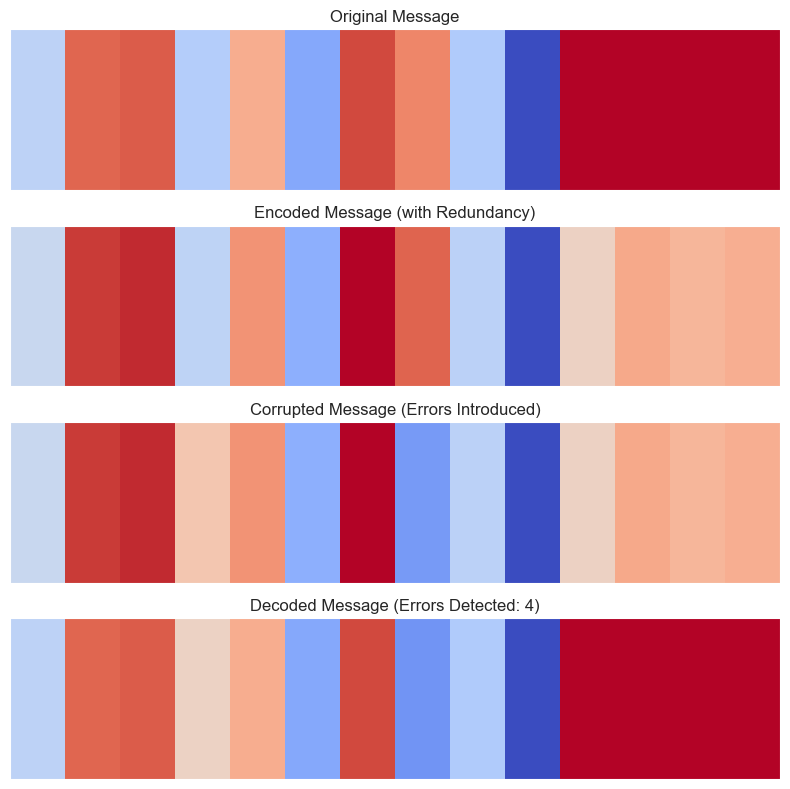

In [4]:
# Plot original, encoded, corrupted, and decoded messages
fig, ax = plt.subplots(4, 1, figsize=(8, 8))

ax[0].imshow([original_array], cmap="coolwarm", aspect="auto")
ax[0].set_title("Original Message")

ax[1].imshow([encoded_array], cmap="coolwarm", aspect="auto")
ax[1].set_title("Encoded Message (with Redundancy)")

ax[2].imshow([corrupted_array], cmap="coolwarm", aspect="auto")
ax[2].set_title("Corrupted Message (Errors Introduced)")

ax[3].imshow([decoded_array], cmap="coolwarm", aspect="auto")
ax[3].set_title(f"Decoded Message (Errors Detected: {errors_detected})")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.show()